# 1. How did the COVID-19 pandemic impact ABC Company’s parcel business?

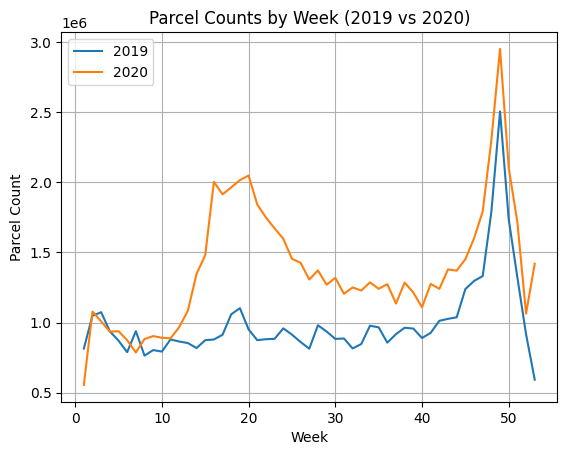

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Step 1: Load the dataset
df = pd.read_csv('COVID_Parcel_Business.csv')

enterprise_range = (500000, float('inf'))
large_range = (200000, 500000)
medium_range = (10000, 200000)
small_range = (1000, 10000)

# Filter data for the years 2019 and 2020
df_2019 = df[df['THE_YEAR'] == 2019]
df_2020 = df[df['THE_YEAR'] == 2020]

# Group data by week and sum the parcel count
df_2019_weekly = df_2019.groupby('THE_WEEK')['VOLUME'].sum().reset_index()
df_2020_weekly = df_2020.groupby('THE_WEEK')['VOLUME'].sum().reset_index()

# Display the week-wise parcel counts for 2019
#print("Week-wise parcel counts for 2019:")
#print(df_2019_weekly)

# Display the week-wise parcel counts for 2020
#print("\nWeek-wise parcel counts for 2020:")
#print(df_2020_weekly)


# Plot the line chart
plt.plot(df_2019_weekly['THE_WEEK'], df_2019_weekly['VOLUME'], label='2019')
plt.plot(df_2020_weekly['THE_WEEK'], df_2020_weekly['VOLUME'], label='2020')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Parcel Count')
plt.title('Parcel Counts by Week (2019 vs 2020)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# 2. When were customer volumes first impacted by COVID-19?

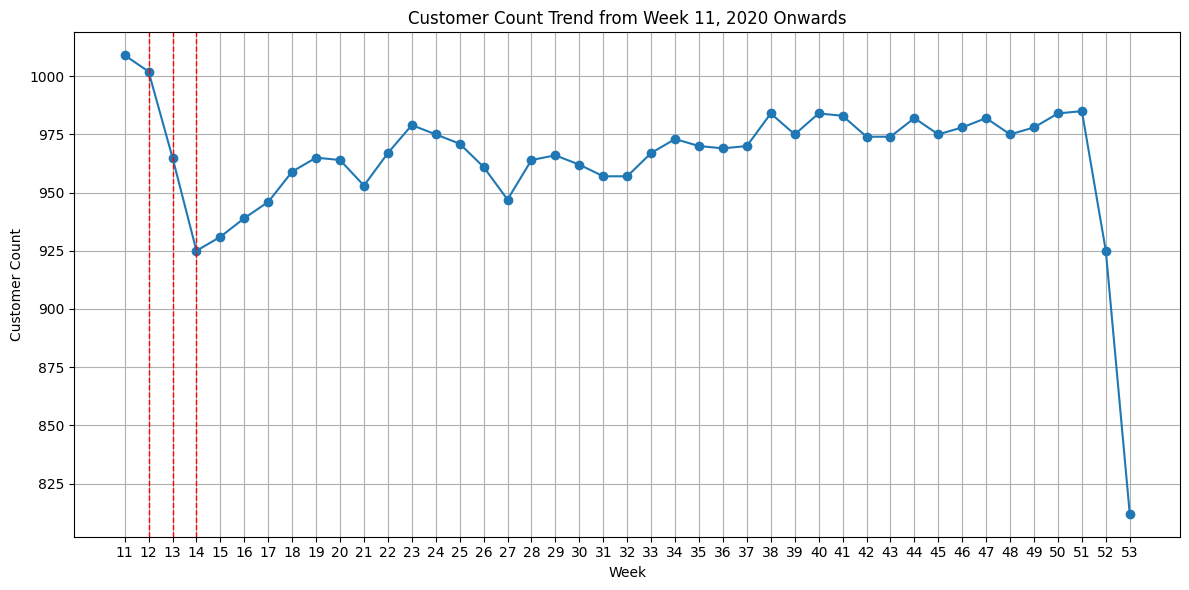

First 3 impacted weeks:
Week 12, Customer count: 1002
Week 13, Customer count: 965
Week 14, Customer count: 925
Trend: Decrease


In [5]:
# Filter data from Week 11, 2020 onwards
df_filtered = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 11)]

# Calculate total customer count for each week from Week 11, 2020 onwards
weekly_customer_count = df_filtered.groupby('THE_WEEK')['FakeCustomerID'].nunique().reset_index()

# Identify the first 3 consecutive weeks where the customer count decreased or increased
consecutive_impacted_weeks = weekly_customer_count[weekly_customer_count['FakeCustomerID'].diff().fillna(0) != 0].head(3)

# Determine the trend (increase or decrease) based on the first change
trend = 'Increase' if consecutive_impacted_weeks.iloc[0]['FakeCustomerID'] > weekly_customer_count.iloc[0]['FakeCustomerID'] else 'Decrease'

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(weekly_customer_count['THE_WEEK'], weekly_customer_count['FakeCustomerID'], marker='o', linestyle='-')
plt.title('Customer Count Trend from Week 11, 2020 Onwards')
plt.xlabel('Week')
plt.ylabel('Customer Count')
plt.grid(True)
plt.xticks(weekly_customer_count['THE_WEEK'])
plt.tight_layout()

# Highlighting the first 5 impacted weeks
for week in consecutive_impacted_weeks['THE_WEEK']:
    plt.axvline(x=week, color='r', linestyle='--', linewidth=1)

plt.show()

print(f"First 3 impacted weeks:")
for index, row in consecutive_impacted_weeks.iterrows():
    print(f"Week {int(row['THE_WEEK'])}, Customer count: {int(row['FakeCustomerID'])}")

print(f"Trend: {trend}")


# 3 . What events within the COVID timeline may have contributed to the change?

-Lockdowns and Stay-at-Home Orders (March 2020)

-Initial Panic Buying (March-April 2020)

-Increased online purchase

-Travel Restrictions led to increase in parcel volumes

# 4. How did COVID-19 impact peak season in 2020?

Total volume of peak season in 2019: 15372691
Total volume of peak season in 2020: 19442907


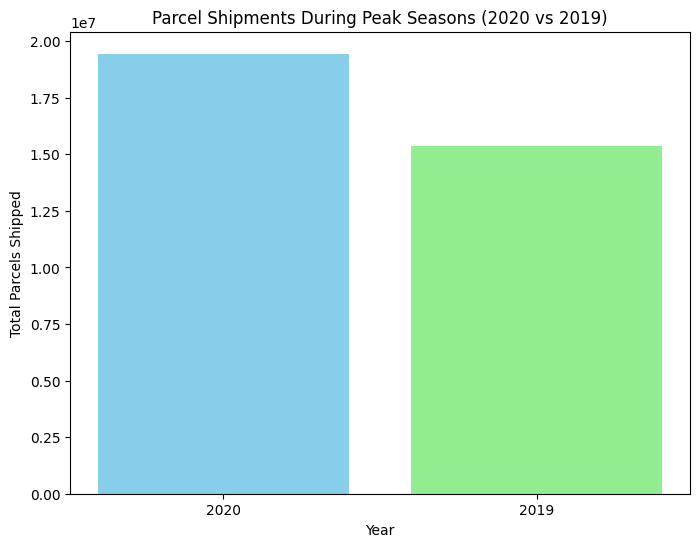

In [23]:
# Define the start and end week numbers for the peak seasons in 2019 and 2020
peak_season_2019_start_week = 45  # Week 45 starts on November 4, 2019
peak_season_2019_end_week = 3  # Week 3 ends on January 20, 2020
peak_season_2020_start_week = 45  # Week 45 starts on November 2, 2020
peak_season_2020_end_week = 3  # Week 3 ends on January 17, 2021

# Filter the dataset for the peak seasons in 2019 and 2020
peak_season_2019 = df[((df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= peak_season_2019_start_week)) | ((df['THE_YEAR'] == 2020) & ((df['THE_WEEK'] <= peak_season_2019_end_week) ))]
peak_season_2020 = df[((df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= peak_season_2020_start_week)) | ((df['THE_YEAR'] == 2021) & ((df['THE_WEEK'] <= peak_season_2020_end_week) ))]

# Calculate the total volume for each peak season
total_volume_peak_season_2019 = peak_season_2019['VOLUME'].sum()
total_volume_peak_season_2020 = peak_season_2020['VOLUME'].sum()

print("Total volume of peak season in 2019:", total_volume_peak_season_2019)
print("Total volume of peak season in 2020:", total_volume_peak_season_2020)

plt.figure(figsize=(8, 6))
plt.bar(['2020', '2019'], [total_volume_peak_season_2020, total_volume_peak_season_2019], color=['skyblue', 'lightgreen'])
plt.title('Parcel Shipments During Peak Seasons (2020 vs 2019)')
plt.xlabel('Year')
plt.ylabel('Total Parcels Shipped')
plt.show()


## 5.How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

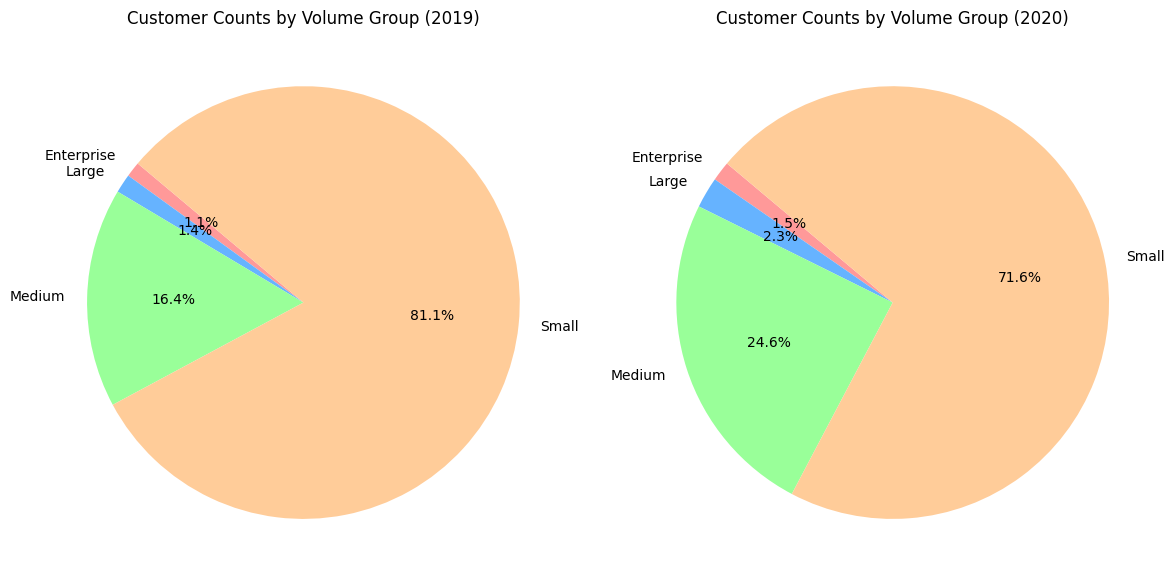

In [8]:

def calculate_customer_counts(df, year):

    # Filter the dataset for the specified year
    df_year = df[df['THE_YEAR'] == year]

    # Calculate the total parcel volumes for each customer
    customer_volumes = df_year.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers by their total parcel volumes
    enterprise_customers = customer_volumes[customer_volumes > enterprise_range[0]]
    large_customers = customer_volumes[(customer_volumes >= large_range[0]) & (customer_volumes <= large_range[1])]
    medium_customers = customer_volumes[(customer_volumes >= medium_range[0]) & (customer_volumes <= medium_range[1])]
    small_customers = customer_volumes[(customer_volumes >= small_range[0]) & (customer_volumes <= small_range[1])]

    # Count the number of customers in each volume group
    enterprise_count = len(enterprise_customers)
    large_count = len(large_customers)
    medium_count = len(medium_customers)
    small_count = len(small_customers)

    # Return the counts
    return enterprise_count, large_count, medium_count, small_count


# Calculate customer counts for each year
years = [2019, 2020]
counts = {year: calculate_customer_counts(df, year) for year in years}

# Plotting the chart
labels = ['Enterprise', 'Large', 'Medium', 'Small']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    plt.subplot(1, 2, i+1)
    plt.pie(counts[year], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Customer Counts by Volume Group ({year})')

plt.tight_layout()
plt.show()


# 6. What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?

In [9]:
# Current period: week 1 to week 15, 2020 || Previous period: week 1 to week 15, 2019
current_period = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] <= 15)]
previous_period = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] <= 15)]

# Calculate the total volume for each period
total_volume_current = current_period['VOLUME'].sum()
total_volume_previous = previous_period['VOLUME'].sum()

# Calculate the ISGR
constant_isgr = ((total_volume_current - total_volume_previous) / total_volume_previous) * 100

print("ISGR : {:.2f}%".format(constant_isgr))

ISGR : 11.40%


In [10]:
# Step 1: Find volume in 2020 (week 13 to week 53)
def calculate_volume_2020(df):
    df_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 13)]
    volume_2020 = df_2020.groupby('FakeCustomerID')['VOLUME'].sum()
    return volume_2020

# Step 2: Find volume in 2019 for customers existing in 2020
def calculate_volume_2019(df, volume_2020):
    df_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 13)]
    volume_2019 = df_2019.groupby('FakeCustomerID')['VOLUME'].sum()

    # Filter volume 2019 for customers existing in volume 2020
    volume_2019_filtered = volume_2019[volume_2019.index.isin(volume_2020.index)]
    return volume_2019_filtered

# Step 3: Calculate ISGR
def calculate_isgr(volume_2020, volume_2019):
    isgr = ((volume_2020 - volume_2019) / volume_2019) * 100
    return isgr

# Load your dataset into a pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Example usage
volume_2020 = calculate_volume_2020(df)
volume_2019_filtered = calculate_volume_2019(df, volume_2020)
isgr = calculate_isgr(volume_2020, volume_2019_filtered)




Customer Classification:
VOLUME
High Growth Customers    393
Declining Customers      367
Stable Customers         274
Name: count, dtype: int64


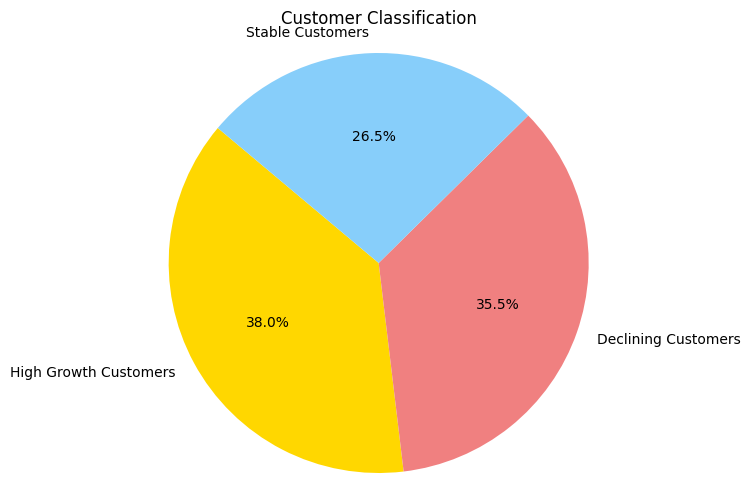

In [11]:
# Define ISGR thresholds for classification
# Less than 0% - Declining Customers
# 0 to 50% - Stable Customers
# Above 50% - High Growth Customers

declining_threshold = 0
stable_threshold = 50

# Classify customers based on their ISGR
def classify_customers(isgr_series):
    if isgr_series < declining_threshold:
        return 'Declining Customers'
    elif declining_threshold <= isgr_series <= stable_threshold:
        return 'Stable Customers'
    else:
        return 'High Growth Customers'

# Calculate ISGR for each customer
isgr = calculate_isgr(volume_2020, volume_2019_filtered)

# Apply classification function to ISGR Series
customer_classification = isgr.apply(classify_customers)

# Count the number of customers in each group
customer_counts = customer_classification.value_counts()

# Print the counts of customers in each group
print("Customer Classification:")
print(customer_counts)

# Define colors for each customer group
colors = ['gold', 'lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(customer_counts, labels=customer_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Customer Classification')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()


# 7. What percent of each customer group are new customers during the COVID observation period?

Customers in each group in pre-covid:
Enterprise Customers: 13
Large Customers: 18
Medium Customers: 203
Small Customers: 827

Customers in each group during covid:
Enterprise Customers: 12
Large Customers: 22
Medium Customers: 198
Small Customers: 654

Percentage of New Enterprise Customers : 8.0
Percentage of New Large Customers : 41.0
Percentage of New Medium Customers : 31.0
Percentage of New Small Customers : 8.0


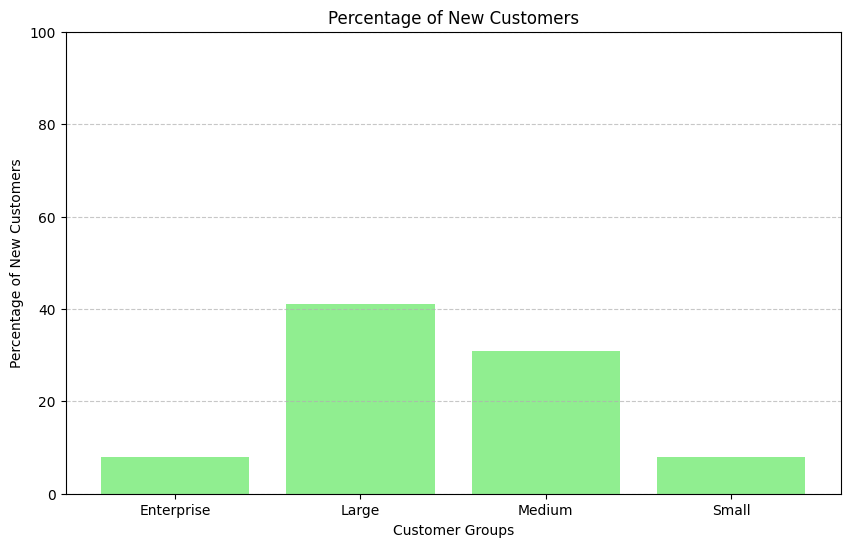

In [19]:


def calculate_customer_counts(df, start_year, start_week, end_year, end_week):


    # Convert start and end year/week into dates
    start_date = datetime.strptime(f'{start_year}-W{start_week}-1', "%Y-W%W-%w").date()
    end_date = datetime.strptime(f'{end_year}-W{end_week}-0', "%Y-W%W-%w").date()

    # Filter the dataset for the specified date range
    df_range = df[(df['THE_YEAR'] >= start_year) & (df['THE_YEAR'] <= end_year) &
                  ((df['THE_YEAR'] > start_year) | (df['THE_WEEK'] >= start_week)) &
                  ((df['THE_YEAR'] < end_year) | (df['THE_WEEK'] <= end_week))]

    # Calculate the total parcel volumes for each customer
    customer_volumes = df_range.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers by their total parcel volumes
    enterprise_customers = customer_volumes[customer_volumes > enterprise_range[0]]
    large_customers = customer_volumes[(customer_volumes >= large_range[0]) & (customer_volumes <= large_range[1])]
    medium_customers = customer_volumes[(customer_volumes >= medium_range[0]) & (customer_volumes <= medium_range[1])]
    small_customers = customer_volumes[(customer_volumes >= small_range[0]) & (customer_volumes <= small_range[1])]

    # Count the number of customers in each volume group
    enterprise_count = len(enterprise_customers)
    large_count = len(large_customers)
    medium_count = len(medium_customers)
    small_count = len(small_customers)

    # Get the customer IDs for each volume group
    enterprise_ids = enterprise_customers.index.tolist()
    large_ids = large_customers.index.tolist()
    medium_ids = medium_customers.index.tolist()
    small_ids = small_customers.index.tolist()

    # Return the counts and customer IDs for each group
    return enterprise_count, large_count, medium_count, small_count, enterprise_ids, large_ids, medium_ids, small_ids


def find_new_customers(customer_ids_1, customer_ids_2):
    # Convert both lists of customer IDs to sets for set operations
    customer_ids_1_set = set(customer_ids_1)
    customer_ids_2_set = set(customer_ids_2)

    # Find the customer IDs that exist in customer_ids_2_set but not in customer_ids_1_set
    new_customers = customer_ids_2_set - customer_ids_1_set

    # Convert the result back to a list if needed
    new_customers_list = list(new_customers)

    return new_customers_list


# Example usage: Calculate customer counts for a specific year and week range
start_year_1 = 2019
start_week_1 = 1
end_year_1 = 2020
end_week_1 = 11

start_year_2 = 2020
start_week_2 = 12
end_year_2 = 2020
end_week_2 = 53

counts_1 = calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1)
counts_2 = calculate_customer_counts(df, start_year_2, start_week_2, end_year_2, end_week_2)

# Print the counts for each group
print("Customers in each group in pre-covid:")
print("Enterprise Customers:", counts_1[0])
print("Large Customers:", counts_1[1])
print("Medium Customers:", counts_1[2])
print("Small Customers:", counts_1[3])

print("\nCustomers in each group during covid:")
print("Enterprise Customers:", counts_2[0])
print("Large Customers:", counts_2[1])
print("Medium Customers:", counts_2[2])
print("Small Customers:", counts_2[3])

# Find new customers for each group between the two periods
new_enterprise_customers = find_new_customers(counts_1[4], counts_2[4])
new_large_customers = find_new_customers(counts_1[5], counts_2[5])
new_medium_customers = find_new_customers(counts_1[6], counts_2[6])
new_small_customers = find_new_customers(counts_1[7], counts_2[7])


# Calculate the percentage of new customers in each group
total_enterprise_customers = counts_2[0]
total_large_customers = counts_2[1]
total_medium_customers = counts_2[2]
total_small_customers = counts_2[3]

percent_new_enterprise_customers = round((len(new_enterprise_customers) / total_enterprise_customers) * 100,0)
percent_new_large_customers = round((len(new_large_customers) / total_large_customers) * 100,0)
percent_new_medium_customers = round((len(new_medium_customers) / total_medium_customers) * 100,0)
percent_new_small_customers = round((len(new_small_customers) / total_small_customers) * 100,0)

# Print the percentages of new customers for each group
print("\nPercentage of New Enterprise Customers :", percent_new_enterprise_customers)
print("Percentage of New Large Customers :", percent_new_large_customers)
print("Percentage of New Medium Customers :", percent_new_medium_customers)
print("Percentage of New Small Customers :", percent_new_small_customers)



# Define the customer groups
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Define the percentages of new customers for each group
percentages_new_customers = [
    percent_new_enterprise_customers,
    percent_new_large_customers,
    percent_new_medium_customers,
    percent_new_small_customers
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(customer_groups, percentages_new_customers, color='lightgreen')
plt.title('Percentage of New Customers')
plt.xlabel('Customer Groups')
plt.ylabel('Percentage of New Customers')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are displayed properly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 8. What percent of 2019 customers in each group did we lose during the COVID observation period?


Percentage of Lost Enterprise Customers : 15.0
Percentage of Lost Large Customers : 28.0
Percentage of Lost Medium Customers : 33.0
Percentage of Lost Small Customers : 28.0


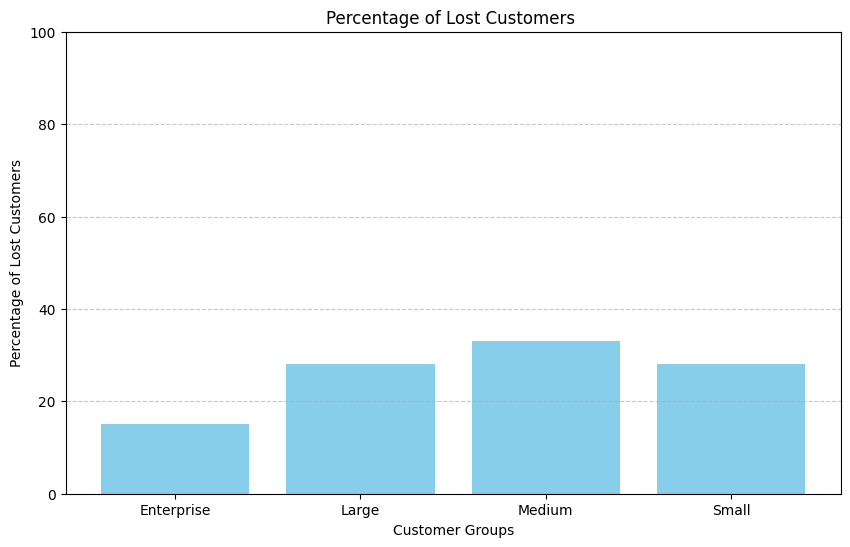

In [13]:
def find_lost_customers(customer_ids_1, customer_ids_2):
    # Convert both lists of customer IDs to sets for set operations
    customer_ids_1_set = set(customer_ids_1)
    customer_ids_2_set = set(customer_ids_2)

    # Find the customer IDs that exist in customer_ids_1_set but not in customer_ids_2_set
    lost_customers = customer_ids_1_set - customer_ids_2_set

    # Convert the result back to a list if needed
    lost_customers_list = list(lost_customers)

    return lost_customers_list


    # Find lost customers for each group between the two periods
lost_enterprise_customers = find_lost_customers(counts_1[4], counts_2[4])
lost_large_customers = find_lost_customers(counts_1[5], counts_2[5])
lost_medium_customers = find_lost_customers(counts_1[6], counts_2[6])
lost_small_customers = find_lost_customers(counts_1[7], counts_2[7])



# Calculate the percentage of lost customers in each group
total_enterprise_customers = counts_1[0]
total_large_customers = counts_1[1]
total_medium_customers = counts_1[2]
total_small_customers = counts_1[3]

percent_lost_enterprise_customers = round((len(lost_enterprise_customers) / total_enterprise_customers) * 100,0)
percent_lost_large_customers = round((len(lost_large_customers) / total_large_customers) * 100,0)
percent_lost_medium_customers = round((len(lost_medium_customers) / total_medium_customers) * 100,0)
percent_lost_small_customers = round((len(lost_small_customers) / total_small_customers) * 100,0)

# Print the percentages of lost customers for each group
print("\nPercentage of Lost Enterprise Customers :", percent_lost_enterprise_customers)
print("Percentage of Lost Large Customers :", percent_lost_large_customers)
print("Percentage of Lost Medium Customers :", percent_lost_medium_customers)
print("Percentage of Lost Small Customers :", percent_lost_small_customers)


# Define the customer groups
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Define the percentages of lost customers for each group
percentages_lost_customers = [
    percent_lost_enterprise_customers,
    percent_lost_large_customers,
    percent_lost_medium_customers,
    percent_lost_small_customers
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(customer_groups, percentages_lost_customers, color='skyblue')
plt.title('Percentage of Lost Customers ')
plt.xlabel('Customer Groups')
plt.ylabel('Percentage of Lost Customers')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are displayed properly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 9. What was the overall impact of COVID on volumes and revenue by customer group?

In [14]:
def calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1, start_year_2, start_week_2, end_year_2, end_week_2):


    # Filter the dataset for the specified date ranges
    df_range_1 = df[(df['THE_YEAR'] >= start_year_1) & (df['THE_YEAR'] <= end_year_1) &
                    ((df['THE_YEAR'] > start_year_1) | (df['THE_WEEK'] >= start_week_1)) &
                    ((df['THE_YEAR'] < end_year_1) | (df['THE_WEEK'] <= end_week_1))]

    df_range_2 = df[(df['THE_YEAR'] >= start_year_2) & (df['THE_YEAR'] <= end_year_2) &
                    ((df['THE_YEAR'] > start_year_2) | (df['THE_WEEK'] >= start_week_2)) &
                    ((df['THE_YEAR'] < end_year_2) | (df['THE_WEEK'] <= end_week_2))]

    # Calculate the total parcel volumes for each customer for both ranges
    customer_volumes_1 = df_range_1.groupby('FakeCustomerID')['VOLUME'].sum()
    customer_volumes_2 = df_range_2.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers by their total parcel volumes for both ranges
    enterprise_customers_1 = customer_volumes_1[customer_volumes_1 > enterprise_range[0]]
    large_customers_1 = customer_volumes_1[(customer_volumes_1 >= large_range[0]) & (customer_volumes_1 <= large_range[1])]
    medium_customers_1 = customer_volumes_1[(customer_volumes_1 >= medium_range[0]) & (customer_volumes_1 <= medium_range[1])]
    small_customers_1 = customer_volumes_1[(customer_volumes_1 >= small_range[0]) & (customer_volumes_1 <= small_range[1])]

    enterprise_customers_2 = customer_volumes_2[customer_volumes_2 > enterprise_range[0]]
    large_customers_2 = customer_volumes_2[(customer_volumes_2 >= large_range[0]) & (customer_volumes_2 <= large_range[1])]
    medium_customers_2 = customer_volumes_2[(customer_volumes_2 >= medium_range[0]) & (customer_volumes_2 <= medium_range[1])]
    small_customers_2 = customer_volumes_2[(customer_volumes_2 >= small_range[0]) & (customer_volumes_2 <= small_range[1])]

    # Count the number of customers in each volume group for both ranges
    enterprise_count_1 = len(enterprise_customers_1)
    large_count_1 = len(large_customers_1)
    medium_count_1 = len(medium_customers_1)
    small_count_1 = len(small_customers_1)

    enterprise_count_2 = len(enterprise_customers_2)
    large_count_2 = len(large_customers_2)
    medium_count_2 = len(medium_customers_2)
    small_count_2 = len(small_customers_2)

    # Calculate total volume by customer group for both ranges
    total_volume_enterprise_1 = enterprise_customers_1.sum()
    total_volume_large_1 = large_customers_1.sum()
    total_volume_medium_1 = medium_customers_1.sum()
    total_volume_small_1 = small_customers_1.sum()

    total_volume_enterprise_2 = enterprise_customers_2.sum()
    total_volume_large_2 = large_customers_2.sum()
    total_volume_medium_2 = medium_customers_2.sum()
    total_volume_small_2 = small_customers_2.sum()

    # Calculate revenue for each customer group
    revenue_enterprise_1 = total_volume_enterprise_1 * 22 * 0.78  # Discount of 12%
    revenue_large_1 = total_volume_large_1 * 22 * 0.83  # Discount of 17%
    revenue_medium_1 = total_volume_medium_1 * 22 * 0.90  # Discount of 10%
    revenue_small_1 = total_volume_small_1 * 22 * 0.96  # Discount of 4%

    revenue_enterprise_2 = total_volume_enterprise_2 * 22 * 0.78  # Discount of 12%
    revenue_large_2 = total_volume_large_2 * 22 * 0.83  # Discount of 17%
    revenue_medium_2 = total_volume_medium_2 * 22 * 0.90  # Discount of 10%
    revenue_small_2 = total_volume_small_2 * 22 * 0.96  # Discount of 4%

    # Return the counts, corresponding customer IDs, total volume, and revenue by customer group for both ranges
    return (
        (enterprise_count_1, enterprise_customers_1.index.tolist(), total_volume_enterprise_1, revenue_enterprise_1),
        (large_count_1, large_customers_1.index.tolist(), total_volume_large_1, revenue_large_1),
        (medium_count_1, medium_customers_1.index.tolist(), total_volume_medium_1, revenue_medium_1),
        (small_count_1, small_customers_1.index.tolist(), total_volume_small_1, revenue_small_1),
        (enterprise_count_2, enterprise_customers_2.index.tolist(), total_volume_enterprise_2, revenue_enterprise_2),
        (large_count_2, large_customers_2.index.tolist(), total_volume_large_2, revenue_large_2),
        (medium_count_2, medium_customers_2.index.tolist(), total_volume_medium_2, revenue_medium_2),
        (small_count_2, small_customers_2.index.tolist(), total_volume_small_2, revenue_small_2)
    )

# Example usage: Calculate customer counts, total volume, and revenue by customer groups for two specific year and week ranges
start_year_1 = 2019
start_week_1 = 1
end_year_1 = 2020
end_week_1 = 11

start_year_2 = 2020
start_week_2 = 12
end_year_2 = 2020
end_week_2 = 53

counts_and_revenue = calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1, start_year_2, start_week_2, end_year_2, end_week_2)

# Accessing the results for the first range
print("2019:")
print("Enterprise Customers:", counts_and_revenue[0][0])
print("Total Volume for Enterprise Customers:", counts_and_revenue[0][2])
print("Revenue for Enterprise Customers:", counts_and_revenue[0][3])

print("Large Customers:", counts_and_revenue[1][0])
print("Total Volume for Large Customers:", counts_and_revenue[1][2])
print("Revenue for Large Customers:", counts_and_revenue[1][3])

print("Medium Customers:", counts_and_revenue[2][0])
print("Total Volume for Medium Customers:", counts_and_revenue[2][2])
print("Revenue for Medium Customers:", counts_and_revenue[2][3])

print("Small Customers:", counts_and_revenue[3][0])
print("Total Volume for Small Customers:", counts_and_revenue[3][2])
print("Revenue for Small Customers:", counts_and_revenue[3][3])

# Accessing the results for the second range
print("\nSecond Range:")
print("Enterprise Customers:", counts_and_revenue[4][0])
print("Total Volume for Enterprise Customers:", counts_and_revenue[4][2])
print("Revenue for Enterprise Customers:", counts_and_revenue[4][3])

print("Large Customers:", counts_and_revenue[5][0])
print("Total Volume for Large Customers:", counts_and_revenue[5][2])
print("Revenue for Large Customers:", counts_and_revenue[5][3])

print("Medium Customers:", counts_and_revenue[6][0])
print("Total Volume for Medium Customers:", counts_and_revenue[6][2])
print("Revenue for Medium Customers:", counts_and_revenue[6][3])

print("Small Customers:", counts_and_revenue[7][0])
print("Total Volume for Small Customers:", counts_and_revenue[7][2])
print("Revenue for Small Customers:", counts_and_revenue[7][3])


2019:
Enterprise Customers: 13
Total Volume for Enterprise Customers: 46268433
Revenue for Enterprise Customers: 793966310.28
Large Customers: 18
Total Volume for Large Customers: 5365926
Revenue for Large Customers: 97981808.75999999
Medium Customers: 203
Total Volume for Medium Customers: 8052884
Revenue for Medium Customers: 159447103.20000002
Small Customers: 827
Total Volume for Small Customers: 2875674
Revenue for Small Customers: 60734234.879999995

Second Range:
Enterprise Customers: 12
Total Volume for Enterprise Customers: 47372905
Revenue for Enterprise Customers: 812919049.8000001
Large Customers: 22
Total Volume for Large Customers: 6841805
Revenue for Large Customers: 124931359.3
Medium Customers: 198
Total Volume for Medium Customers: 7015085
Revenue for Medium Customers: 138898683.0
Small Customers: 654
Total Volume for Small Customers: 2422296
Revenue for Small Customers: 51158891.519999996


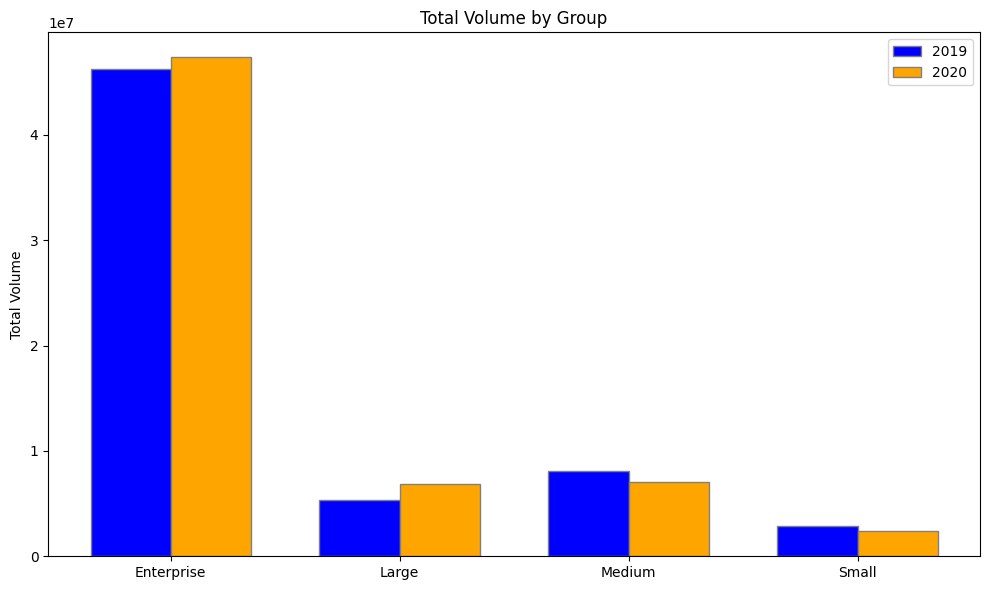

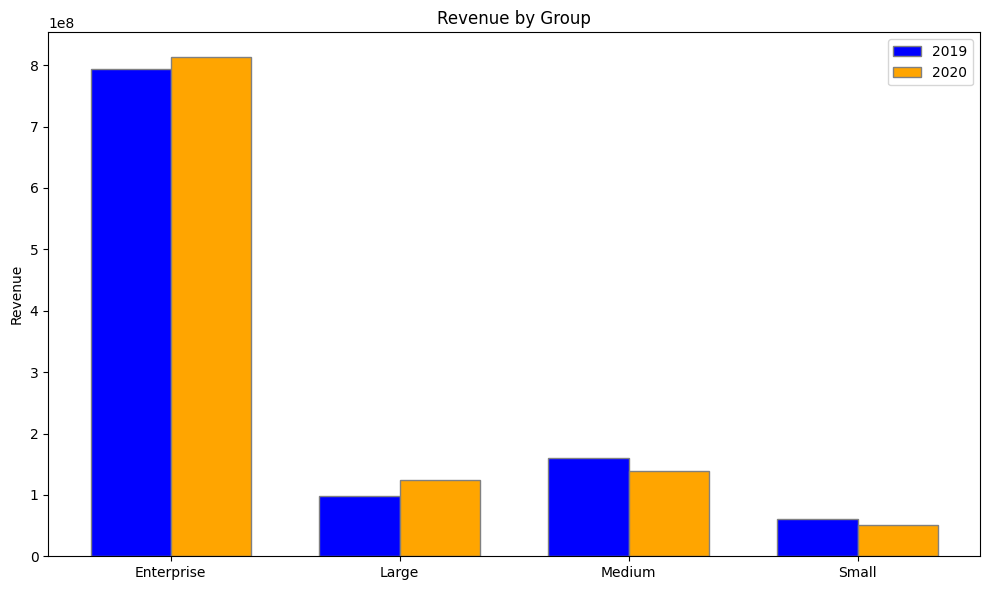

In [15]:


def plot_volume_and_revenue(counts_and_revenue):
    # Customer group names
    groups = ['Enterprise', 'Large', 'Medium', 'Small']

    # Extract total volume and revenue for both date ranges
    total_volume_1 = [count_and_revenue[2] for count_and_revenue in counts_and_revenue[:4]]
    total_volume_2 = [count_and_revenue[2] for count_and_revenue in counts_and_revenue[4:]]
    revenue_1 = [count_and_revenue[3] for count_and_revenue in counts_and_revenue[:4]]
    revenue_2 = [count_and_revenue[3] for count_and_revenue in counts_and_revenue[4:]]

    # Set position of bar on X axis
    bar_width = 0.35
    r1 = np.arange(len(groups))
    r2 = [x + bar_width for x in r1]

    # Plotting
    fig, axs = plt.subplots(figsize=(10, 6))

    # Total volume
    axs.bar(r1, total_volume_1, color='blue', width=bar_width, edgecolor='grey', label='2019')
    axs.bar(r2, total_volume_2, color='orange', width=bar_width, edgecolor='grey', label='2020')
    axs.set_xticks([r + bar_width/2 for r in range(len(groups))])
    axs.set_xticklabels(groups)
    axs.set_ylabel('Total Volume')
    axs.set_title('Total Volume by Group')
    axs.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Plotting
    fig, axs = plt.subplots(figsize=(10, 6))

    # Revenue
    axs.bar(r1, revenue_1, color='blue', width=bar_width, edgecolor='grey', label='2019')
    axs.bar(r2, revenue_2, color='orange', width=bar_width, edgecolor='grey', label='2020')
    axs.set_xticks([r + bar_width/2 for r in range(len(groups))])
    axs.set_xticklabels(groups)
    axs.set_ylabel('Revenue')
    axs.set_title('Revenue by Group')
    axs.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage: Pass the counts and revenue data to the plotting function
plot_volume_and_revenue(counts_and_revenue)


# Questions Handled by :
 - Question 1 - Anish Appukuttan
 - Question 2 - Anish Appukuttan
 - Question 3 - Anish Appukuttan
 - Question 4 - Sabitha M Varghese
 - Question 5 - Sabitha M Varghese
 - Question 6 - Sabitha M Varghese
 - Question 7 - Anu Annie Koshy
 - Question 8 - Anu Annie Koshy
 - Question 9 - Sabitha M Varghese


 ## PPT Creation - Anu Annie Koshy
 ## Excel Verification - Anish & Anu & Sabitha